In [439]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # scikit-learn metrics module for computing accuracy
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages

In [440]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(20) # Preview the dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [441]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label'] # Define new column names
diabetes_df.columns = col_names # Rename column names
diabetes_df.head(3) # Preview the dataset


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


#Summary of dataset


In [442]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Frequency distributions of values in variables

In [443]:
for col in col_names:
  diabetes_df[col].value_counts()

# Exploring target variable

In [444]:
diabetes_df['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

# Checking missing values in variables

In [445]:
diabetes_df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

# iii. Defining feature vector and target variable

In [446]:
X = diabetes_df.drop(['label'], axis=1) # Drop the target variable
y = diabetes_df['label']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


# Splitiing data

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

((576, 8), (192, 8))

#Feature engineering: encoding categorical variables
###This is the process of transforming raw data into useful features that help us better understand our
###model better and increase its predictive power.

In [448]:
X_train.dtypes # Check data types in X_train


pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
dtype: object

In [449]:
X_train.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
118,4,97,60,23,0,28.2,0.443,22
205,5,111,72,28,0,23.9,0.407,27
506,0,180,90,26,90,36.5,0.314,35
587,6,103,66,0,0,24.3,0.249,29
34,10,122,78,31,0,27.6,0.512,45
257,2,114,68,22,0,28.7,0.092,25
216,5,109,62,41,129,35.8,0.514,25
598,1,173,74,0,0,36.8,0.088,38
761,9,170,74,31,0,44.0,0.403,43
160,4,151,90,38,0,29.7,0.294,36


In [450]:

!pip install --upgrade category_encoders
import category_encoders as ce # Import the relevant library
encoder = ce.OrdinalEncoder(cols=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
'pedigree', 'age'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head(10)
print(X_train.head(10))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     pregnant  glucose  bp  skin  insulin  bmi  pedigree  age
118         1        1   1     1        1    1         1    1
205         2        2   2     2        1    2         2    2
506         3        3   3     3        2    3         3    3
587         4        4   4     4        1    4         4    4
34          5        5   5     5        1    5         5    5
257         6        6   6     6        1    6         6    6
216         2        7   7     7        3    7         7    6
598         7        8   8     4        1    8         8    7
761         8        9   8     5        1    9         9    8
160         1       10   3     8        1   10        10    9


# Building decision tree classifier with the Gini index criterion

In [451]:
clf_gini = DecisionTreeClassifier(criterion='gini',
max_depth=4,
random_state=0) # Create decision tree classifier object
clf_gini.fit(X_train, y_train) # Train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

# Predicting results for the test set

In [452]:
y_pred = clf_gini.predict(X_test)

# Evaluating model

In [453]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6875


# Confusion matrix

In [454]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[111,  12],
       [ 48,  21]])

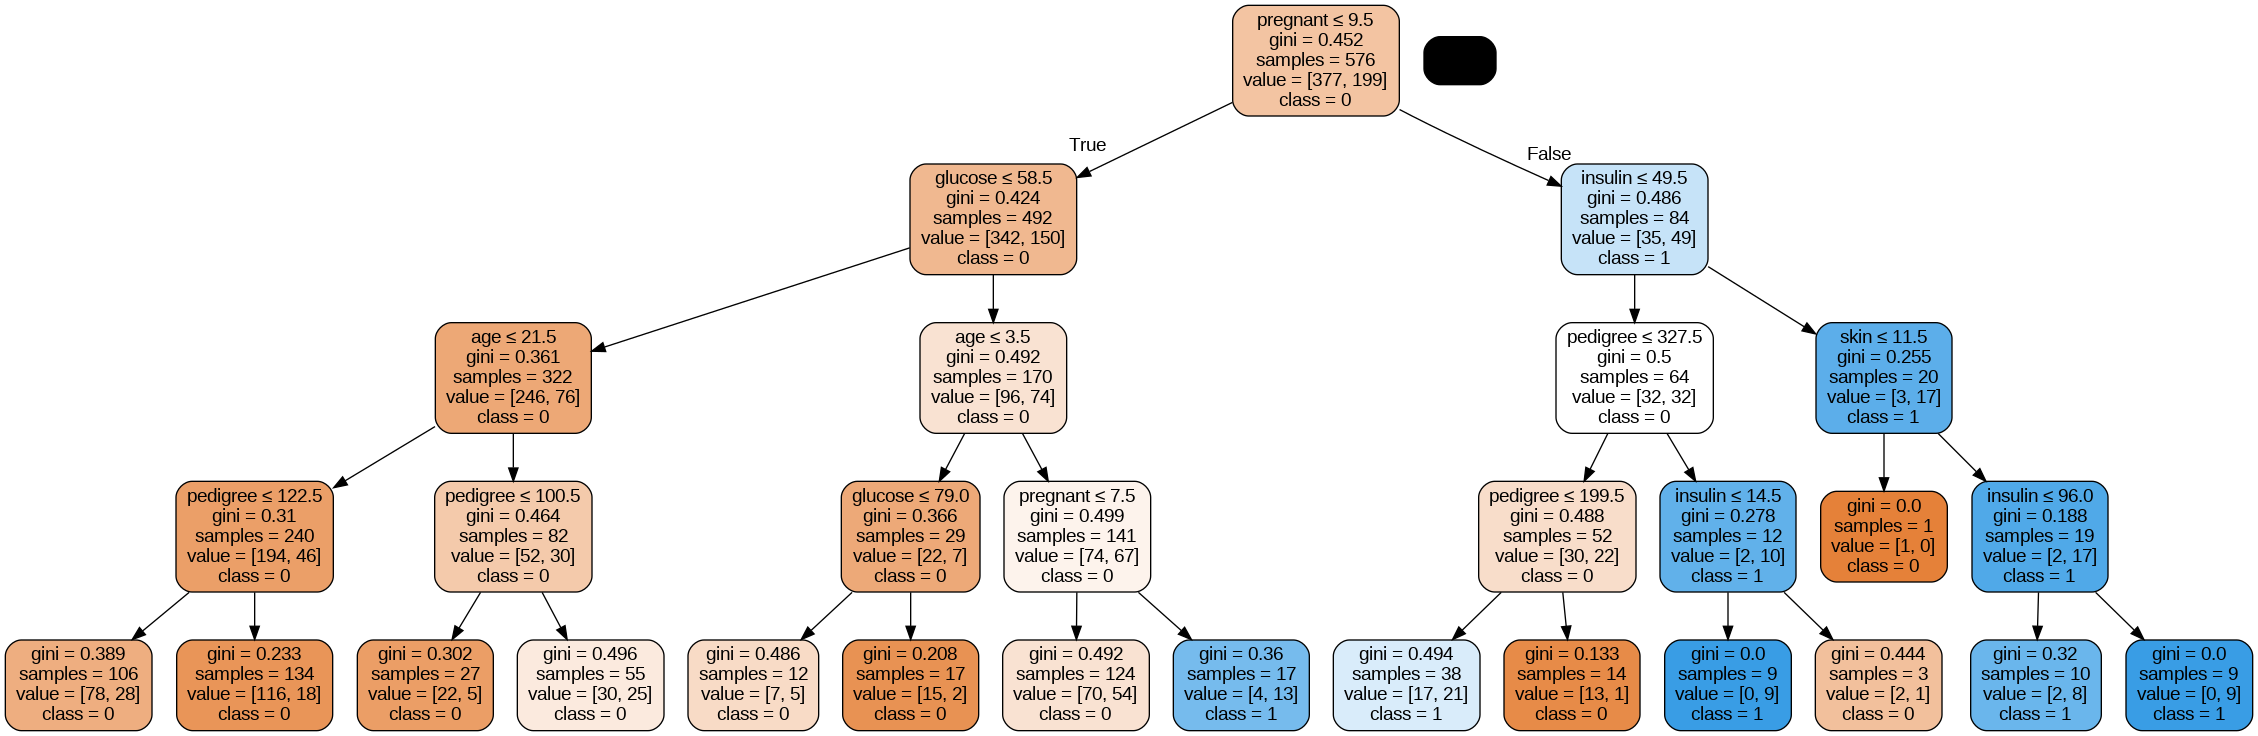

In [455]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names=X.columns,
class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [456]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       123
           1       0.64      0.30      0.41        69

    accuracy                           0.69       192
   macro avg       0.67      0.60      0.60       192
weighted avg       0.68      0.69      0.65       192



In [457]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # scikit-learn metrics module for computing accuracy
import warnings
warnings.filterwarnings('ignore') # Ignore warning messages


!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/



In [458]:
wine_df = pd.read_csv('wine.csv')
wine_df.head(20) # Preview the dataset

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [459]:
wine_df.isnull().sum()

Label                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

# Split the dataset into features (X) and the target variable (y). In this dataset, the target variable is the "Quality" column, and the features are all the other columns:

In [460]:
X = wine_df.drop(['Label'], axis=1) # Drop the target variable
y = wine_df['Label']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: Label, Length: 177, dtype: int64


# Split the data into training and testing sets. We'll use 80% of the data for training and 20% for testing

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=1) # 80% training and 20% test
X_train.shape, X_test.shape # Shapes of X_train and X_test


((141, 13), (36, 13))

In [462]:
# Get all column names except "label"
#cols_to_encode = [col for col in wine_df.columns if col != "Label"]
# Initialize the OrdinalEncoder with the selected columns
#encoder = ce.OrdinalEncoder(cols=cols_to_encode)


#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)


#print(X_train.head())

# Import the decision tree classifier and create two instances of it, one for each criterion (Gini and entropy):

In [463]:
from sklearn.tree import DecisionTreeClassifier

gini_classifier = DecisionTreeClassifier(criterion='gini',max_depth=4,
random_state=1)
entropy_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4,
random_state=1)


# Fit the classifiers to the training data:


In [464]:
gini_classifier.fit(X_train, y_train)
entropy_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

# Predict the classes for the testing data:

In [465]:
gini_predictions = gini_classifier.predict(X_test)
entropy_predictions = entropy_classifier.predict(X_test)



# Evaluating model

#Accuracy:
###Accuracy measures the overall correctness of the classifier by calculating the ratio of correctly predicted instances to the total number of instances in the test set. It provides a general view of the classifier's performance

In [466]:
print('Accuracy of the geni_predicition:', metrics.accuracy_score(y_test, gini_predictions))
print('Accuracy of the entropy_prediction :', metrics.accuracy_score(y_test, entropy_predictions))


Accuracy of the geni_predicition: 0.8888888888888888
Accuracy of the entropy_prediction : 0.9444444444444444


#Precision, Recall, and F1-score:
###Precision, recall, and F1-score are commonly used metrics for imbalanced datasets where the distribution of classes is uneven.

###Precision measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive. It indicates the classifier's ability to avoid false positives.

###Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates the classifier's ability to find all positive instances.

###F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall.

In [467]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained and predicted with your decision tree classifiers: dt_gini and dt_entropy
# y_test and y_pred are the true labels and predicted labels, respectively

# Accuracy
accuracy_gini = accuracy_score(y_test, gini_predictions)
accuracy_entropy = accuracy_score(y_test, entropy_predictions)


# Precision
precision_gini = precision_score(y_test, gini_predictions, average='weighted')
precision_entropy = precision_score(y_test, entropy_predictions, average='weighted')

# Recall
recall_gini = recall_score(y_test, gini_predictions, average='weighted')
recall_entropy = recall_score(y_test, entropy_predictions, average='weighted')

# F1 Score
f1_gini = f1_score(y_test,gini_predictions, average='weighted')
f1_entropy = f1_score(y_test, entropy_predictions, average='weighted')

# Confusion Matrix
cm_gini = confusion_matrix(y_test, gini_predictions)
cm_entropy = confusion_matrix(y_test, entropy_predictions)



# Print the metrics
print("Gini Accuracy:", accuracy_gini)
print("Entropy Accuracy:", accuracy_entropy)
print("Gini Precision:", precision_gini)
print("Entropy Precision:", precision_entropy)
print("Gini Recall:", recall_gini)
print("Entropy Recall:", recall_entropy)
print("Gini F1 Score:", f1_gini)
print("Entropy F1 Score:", f1_entropy)
print("Gini Confusion Matrix:\n", cm_gini)
print("Entropy Confusion Matrix:\n", cm_entropy)


Gini Accuracy: 0.8888888888888888
Entropy Accuracy: 0.9444444444444444
Gini Precision: 0.898809523809524
Entropy Precision: 0.9444444444444444
Gini Recall: 0.8888888888888888
Entropy Recall: 0.9444444444444444
Gini F1 Score: 0.8891534391534393
Entropy F1 Score: 0.9444444444444444
Gini Confusion Matrix:
 [[13  1  0]
 [ 1 13  2]
 [ 0  0  6]]
Entropy Confusion Matrix:
 [[13  1  0]
 [ 1 15  0]
 [ 0  0  6]]


###Confusion Matrix:
A confusion matrix provides a more detailed breakdown of the classifier's performance by showing the true positive, true negative, false positive, and false negative counts

In [468]:
from sklearn.metrics import confusion_matrix

gini_cm = confusion_matrix(y_test, gini_predictions)
entropy_cm = confusion_matrix(y_test, entropy_predictions)

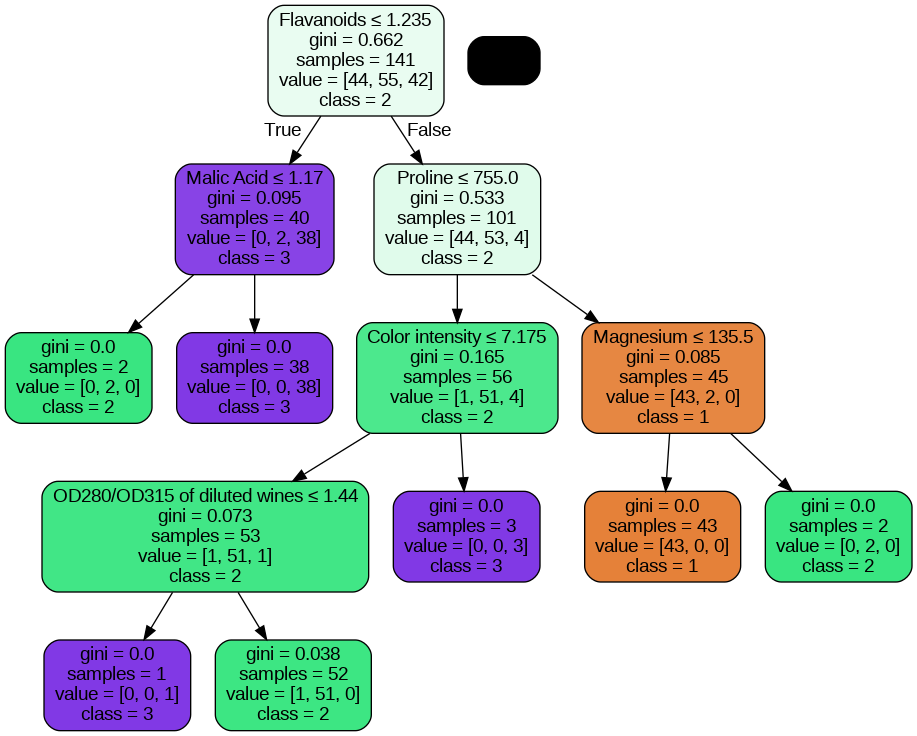

In [469]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(gini_classifier,
out_file=dot_data,
filled=True,
rounded=True,
special_characters=True,
feature_names=X.columns,
class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wines.png')
Image(graph.create_png())